In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [60]:
df = pd.read_csv("Data/Player_data.csv")

In [61]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,"2,813",...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [62]:
print(df.columns[:20])

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'SoT%'],
      dtype='object')


### Initially we will be dropping the following columns
- Player
- Nation
- Pos
- Squad
- Comp
- Age
- Born
- MP
- Starts
- Min
- 90s

In [63]:
df1 = df.drop(['Player', 'Nation', 'Squad', 'Comp', 'Born', 'MP',
       'Starts', 'Min', '90s'], axis=1)
df1.head()

,Pos,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,DF,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,DF,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,DF,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,DF,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,DF,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


### Label encoding the "Pos" column

In [64]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df1['Pos_Encoded'] = label_encoder.fit_transform(df1['Pos'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: DF
1: DF,FW
2: DF,MF
3: FW
4: FW,DF
5: FW,MF
6: GK
7: GK,MF
8: MF
9: MF,DF
10: MF,FW


### Dropping pos column

In [65]:
df1 = df1.drop('Pos',axis=1)
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,0
4,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.0,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,0


### Removing null values and '#DIV/0!'

In [66]:
df1.replace('#DIV/0!', 0, inplace=True)
df1.fillna(0, inplace=True)
print(df1.isnull().sum())

Age                    0
Ast/90                 0
npG/90                 0
npG+A/90               0
xA/90                  0
                      ..
PassTarget/90          0
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Pos_Encoded            0
Length: 119, dtype: int64


### Scaling all columns except 'pos'

In [67]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1.drop('Pos_Encoded', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=df1.drop('Pos_Encoded', axis=1).columns)
scaled_df['Pos_Encoded'] = df1['Pos_Encoded']
scaled_df.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,...,0.652945,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0
1,1.458658,-0.349578,-0.022716,-0.281880,-0.465387,-0.327012,-0.510893,-0.513823,-0.381540,0.409017,...,-0.668867,-0.705183,-0.524026,-0.644202,-0.502675,0.018461,0.434973,0.816421,-0.859809,0
2,-0.267517,-0.349578,-0.572368,-0.581208,-0.533018,-0.168919,-0.393792,-0.137921,-0.279321,-0.056101,...,-0.891384,-0.843771,-0.574309,-0.709709,-0.777105,-0.595868,-0.190583,0.856330,-0.918152,0
3,1.890202,-0.349578,-0.144861,-0.348397,-0.330126,-0.327012,-0.432826,-0.358559,-0.401984,-0.097141,...,-0.193945,-0.389510,-0.574309,-0.662068,-0.825130,-0.528961,-0.158002,0.759407,-0.761686,0
4,1.458658,-0.220160,-0.572368,-0.481432,-0.330126,-0.432407,-0.510893,-0.685430,-0.708643,-1.109457,...,-0.037851,-0.112334,-0.524026,-0.525098,-0.646750,0.450317,0.891107,0.833525,-0.732514,0


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

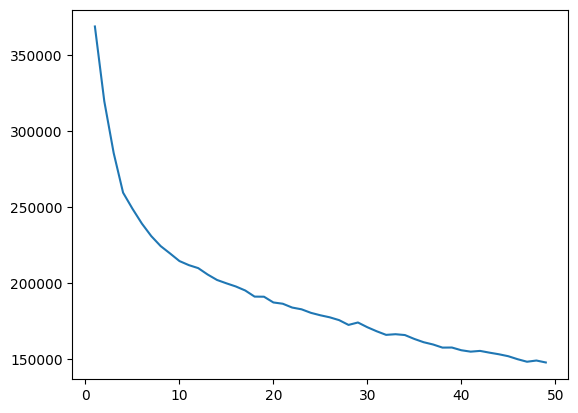

In [68]:
clusters=list(range(1,50))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(scaled_df)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [12]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(scaled_df)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.17120137692091705


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.2037855808062185


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.2231317678692733


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.18019912997615745


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.16688733177081622


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.16591689783228025


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.17205676502537542


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.1588125654006206


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the silhouette score is 0.15673260687462337


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the silhouette score is 0.16203476008231663


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the silhouette score is 0.14370656530049378


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the silhouette score is 0.1461630276387181


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the silhouette score is 0.14745534344380612


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, the silhouette score is 0.15066335110014675


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16, the silhouette score is 0.15099759643503163


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17, the silhouette score is 0.15196274892132303


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18, the silhouette score is 0.13715275407848465


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19, the silhouette score is 0.13150837483465347


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20, the silhouette score is 0.13156795456242054


### Applying K-means for 15 clusters

In [41]:
cluster = KMeans(n_clusters=60, max_iter=150, random_state= 15)
cluster.fit(scaled_df)

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=60, random_state=15)

In [42]:
df1['Cluster_Id'] = cluster.labels_
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_Id
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,...,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0,32
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,...,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0,47
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,...,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0,43
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,...,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,0,14
4,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.0,...,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,0,47


In [43]:
df['Cluster']=df1['Cluster_Id']
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Cluster
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,32
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,47
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,43
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,14
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,"2,813",...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,47


In [44]:
print(scaled_df.shape)
print(df.shape)
print(df1.shape)

(2823, 119)
(2823, 129)
(2823, 120)


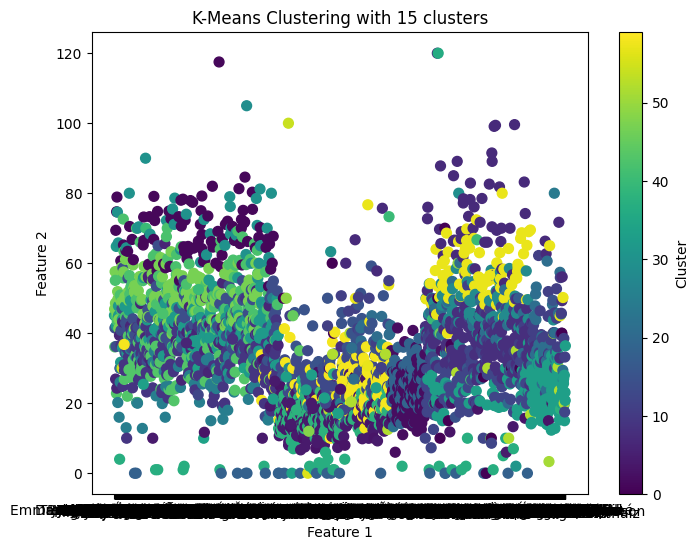

In [45]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Player'], df['PassCmp/90'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 15 clusters')
plt.colorbar(label='Cluster')
plt.show()

In [46]:
a = df['Cluster'].value_counts().reset_index(name='counts').sort_values(by=['Cluster', 'counts'], ascending=[True, True])
a.to_csv("Data/cluster_counts.csv")

### Getting the csv file for classification

In [47]:
df.to_csv("Data/classification_data.csv")

In [40]:
a

,Cluster,counts
39,0,5
1,1,176
21,2,58
37,3,6
18,4,70
...,...,...
63,70,1
6,71,107
60,72,1
44,73,2
